In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import pandas as pd
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of measurements: 9200, number of the peak measurement: 5281


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

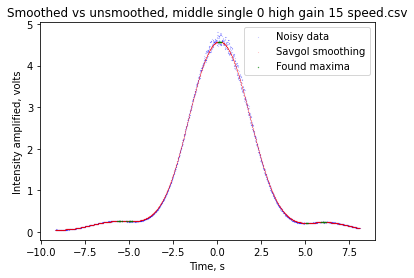

In [ ]:
4.5

def round_up_to_odd(f):
    return np.ceil(f) // 2 * 2 + 1

name = '/content/drive/My Drive/Diffraction/4.5/middle single 0 high gain 15 speed.csv'

wavelength = 653E-9
z = 59.5E-1
a = 0.11e-2

speed_15 = 1.0996e-4
speed_20 = 1.9663e-4

e_speed_15 = 0.033e-4
e_speed_20 = 0.033e-4

data = pd.read_csv(name, skiprows = 1)
time, intensity = pd.DataFrame.to_numpy(data).T
time = time - time[np.argmax(intensity)]
print('Number of measurements: ' + str(len(time)) + ', number of the peak measurement: ' + str(np.argmax(intensity)))

# start = 0
# end= 9200
start = 3900
end = 6500
time = time[start:end]
intensity = intensity[start:end]

savgol_window_length = int(round_up_to_odd((end - start) / 20))

savgol_intensity = savgol_filter(intensity, savgol_window_length, 1)

peak_indices = find_peaks(savgol_intensity)[0]
peaks = savgol_intensity[peak_indices]

# find the predicted slit width a; a = {2 * lambda * z} / x;  lambda - laser wavelength; z - distance between detector and slit; x - width of strongest fringe, distance between two closest minima.


fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(time, intensity, label = 'Noisy data', c = 'b', s = 0.005)
ax.scatter(time, savgol_intensity, label = 'Savgol smoothing', c = 'r', s = 0.005)
ax.scatter(time[peak_indices], peaks, label = 'Found maxima', c = 'g', s = 0.1)


ax.set_title('Smoothed vs unsmoothed, ' + name.split('/')[-1])
ax.set_xlabel('Time, s')
ax.set_ylabel('Intensity amplified, volts')
ax.legend()
plt.savefig("abc.png", dpi = 700)
files.download("abc.png")

# maxima = argrelextrema(intensity, np.greater)
# # np.max(maxima)
# # np.max(intensity)

# len(maxima)

<function matplotlib.pyplot.show>

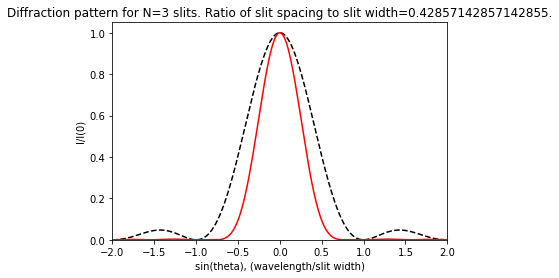

In [ ]:
# Second year lab - diffraction of light by slits experiment
# Author: Paul Walmsley, April 2019

# The dashed line shows the single slit diffraction pattern,
# the red line shows the diffraction pattern for N slits.

import numpy as np
import math
import matplotlib.pyplot as plt


############################
#There are three parameters that control the diffraction pattern:
# 1) Number of slits
N=3
# 2) Ratio of slit spacing to slit width
Ratio=3/7
# 3) Horizontal range, sin(theta) in units of wavelength divided by slit width
xmax=2
############################

x=np.linspace(-xmax,xmax,1000)

Intensity1=np.sinc(x)**2
IntensityN=Intensity1/N**2*np.sin(N*Ratio*math.pi*x)**2/np.sin(Ratio*math.pi*x)**2


plt.clf()
if N>1:
    plt.plot(x,Intensity1,'k--')

plt.plot(x,IntensityN,'r')

plt.xlabel('sin(theta), (wavelength/slit width)')
plt.ylabel('I/I(0)')
plt.xlim(-xmax,xmax)
plt.ylim(0,1.05)
if N==1:
    plt.title('Diffraction pattern for a single slit')
else:
    plt.title('Diffraction pattern for N='+str(N)+' slits. Ratio of slit spacing to slit width='+str(Ratio)+'.')
plt.show

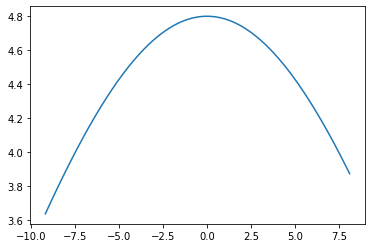

In [ ]:
sinc_input = np.pi * a / wavelength * np.sin(np.arctan(speed_15 * time / z))

test = np.max(intensity) * np.sinc(sinc_input / np.pi) ** 2

plt.plot(time, test)